### Milestone 02: Data and Preliminary Graphs


In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
file_path = './data/NYC_Weather_2022-2024.csv'
nyc_weather_data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset for initial inspection
nyc_weather_data.head()

,STATION,NAME,DATE,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT11
0,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-01,NaN,NaN,NaN,NaN,1.05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-02,NaN,NaN,NaN,NaN,0.00,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-03,NaN,NaN,NaN,NaN,0.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-04,NaN,NaN,NaN,NaN,0.50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-07,NaN,NaN,NaN,NaN,1.38,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Display basic information about the dataset
nyc_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66283 entries, 0 to 66282
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  66283 non-null  object 
 1   NAME     66283 non-null  object 
 2   DATE     66283 non-null  object 
 3   AWND     6026 non-null   float64
 4   DAPR     1114 non-null   float64
 5   MDPR     1106 non-null   float64
 6   PGTM     2948 non-null   float64
 7   PRCP     64814 non-null  float64
 8   SNOW     43470 non-null  float64
 9   SNWD     17255 non-null  float64
 10  TAVG     2196 non-null   float64
 11  TMAX     11044 non-null  float64
 12  TMIN     11044 non-null  float64
 13  TOBS     4893 non-null   float64
 14  WDF2     5819 non-null   float64
 15  WDF5     5816 non-null   float64
 16  WESD     4468 non-null   float64
 17  WESF     5091 non-null   float64
 18  WSF2     5819 non-null   float64
 19  WSF5     5816 non-null   float64
 20  WT01     1400 non-null   float64
 21  WT02     120

In [5]:
# Sort columns by non-null count from max to min
non_null_counts = nyc_weather_data.notnull().sum().sort_values(ascending=False)

print("Columns sorted by non-null counts (max to min):")
print(non_null_counts)

Columns sorted by non-null counts (max to min):
STATION    66283
NAME       66283
DATE       66283
PRCP       64814
SNOW       43470
SNWD       17255
TMAX       11044
TMIN       11044
AWND        6026
WDF2        5819
WSF2        5819
WDF5        5816
WSF5        5816
WESF        5091
TOBS        4893
WESD        4468
PGTM        2948
TAVG        2196
WT01        1400
DAPR        1114
MDPR        1106
WT03         426
WT08         409
WT02         120
WT04          49
WT11          27
WT06           7
WT05           3
dtype: int64


In [6]:
# Select columns that have sufficient non-null values and are relevant to rain or snow
# Precipitation, Snowfall, Snow depth, Max temperature, Min temprature, Average daily wind speed, Water equivalent of snowfall, Water equivalent of snow on the ground 
relevant_features = ['DATE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'AWND', 'WDF2', 'WESF', 'WESD']
weather_subset = nyc_weather_data[relevant_features].copy()

weather_subset

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,WDF2,WESF,WESD
0,2022-12-01,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-02,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-03,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-12-04,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-12-07,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
66278,2024-11-26,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66279,2024-11-27,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66280,2024-11-28,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66281,2024-11-30,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Convert 'DATE' to datetime format for better handling
weather_subset['DATE'] = pd.to_datetime(weather_subset['DATE'])

In [8]:
# Initial exploration of precipitation data (focus on rainy days)
rainy_days = weather_subset[weather_subset['PRCP'] > 0]
print("\nRainy Days Data Summary:")
print(rainy_days.describe())



Rainy Days Data Summary:
                                DATE          PRCP         SNOW         SNWD  \
count                          23564  23564.000000  6897.000000  5948.000000   
mean   2023-11-13 23:29:56.027838976      0.436699     0.150486     0.137845   
min              2022-12-01 00:00:00      0.010000     0.000000     0.000000   
25%              2023-06-07 00:00:00      0.050000     0.000000     0.000000   
50%              2023-11-07 00:00:00      0.200000     0.000000     0.000000   
75%              2024-05-01 00:00:00      0.570000     0.000000     0.000000   
max              2024-11-30 00:00:00      8.050000    11.300000    10.000000   
std                              NaN      0.609939     0.733814     0.723942   

              TMAX         TMIN         AWND         WDF2         WESF  \
count  3529.000000  3530.000000  1934.000000  1864.000000  1855.000000   
mean     64.224143    50.210765     8.048826   190.160944     0.030943   
min      27.000000     5.000000

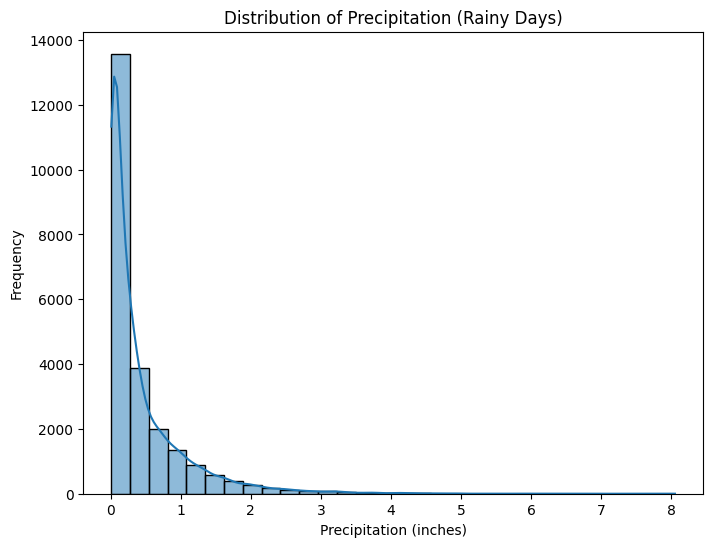

In [9]:
# Visualize data distributions
# Distribution of precipitation
plt.figure(figsize=(8, 6))
sns.histplot(rainy_days['PRCP'], kde=True, bins=30)
plt.title("Distribution of Precipitation (Rainy Days)")
plt.xlabel("Precipitation (inches)")
plt.ylabel("Frequency")
plt.show()


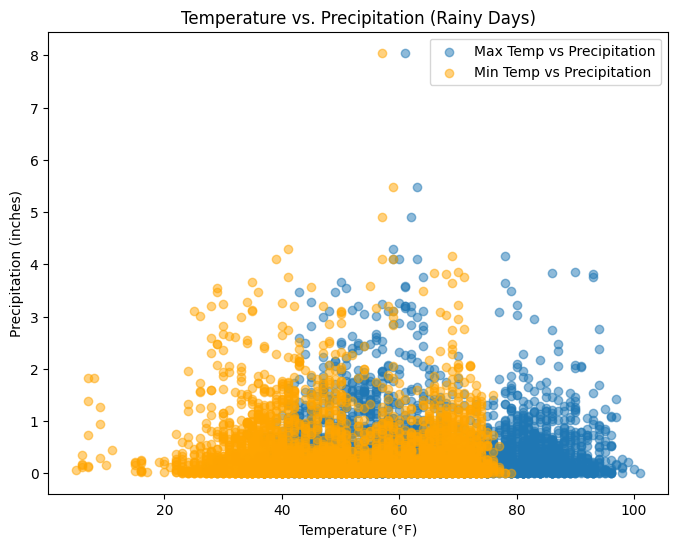

In [10]:
# Scatter plot of temperature vs. precipitation
plt.figure(figsize=(8, 6))
plt.scatter(rainy_days['TMAX'], rainy_days['PRCP'], alpha=0.5, label='Max Temp vs Precipitation')
plt.scatter(rainy_days['TMIN'], rainy_days['PRCP'], alpha=0.5, label='Min Temp vs Precipitation', color='orange')
plt.title("Temperature vs. Precipitation (Rainy Days)")
plt.xlabel("Temperature (°F)")
plt.ylabel("Precipitation (inches)")
plt.legend()
plt.show()

### Next Steps:
1. Develop predictive models using the cleaned dataset.
2. Simulate scenarios where precipitation decreases, leading to sunny conditions.
3. Incorporate this functionality into an interactive interface.

### Notes:
- Missing values were dropped for simplicity in this milestone. Alternative approaches can be explored in future steps.
- Future work includes feature scaling/normalization if required by the predictive model.
